In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sys
import os
import time


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV, RFE

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import mlflow
import mlflow.statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.float_format", "{:.4f}".format)

In [2]:
pd.set_option('display.max_columns', None)

# Data Ingestion

In [3]:
df = pd.read_csv("Modelling_Data/homeAudio_final2.csv")
df.head()

,order_week,Month,Year,adStock_Traditional Marketing,adStock_Digital Marketing,adStock_Partnership Marketing,adStock_Other Marketing,gmv,units,sla,product_procurement_sla,product_mrp,selling_price,NPS,discount,total_transactions,total_premium_products,total_holidays,is_holiday,total_special_sale_days,is_special_sale_day,total_pay_days,is_pay_day,BoomBox,DJController,Dock,DockingStation,FMRadio,HiFiSystem,HomeAudioSpeaker,SlingBox,SoundMixer,VoiceRecorder
0,27,7,2015,2.8611,3.3318,2.9856,0.0000,73660.0000,32,3.0938,3.7188,4108.4062,2301.8750,54.5996,0.3847,32,32,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,4,0,0,0,2,0,26,0,0,0
1,28,7,2015,3.3379,3.8872,3.4832,0.0000,3394594.1331,1888,7.6185,2.7978,3024.2044,1810.2339,54.5996,0.3358,1869,1869,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,60,0,30,1,478,13,1281,0,0,25
2,29,7,2015,3.5764,4.1648,3.7320,0.0000,4012062.0000,2204,7.1574,2.7231,3158.9786,1824.5812,54.5996,0.3496,2192,2192,0.0000,0.0000,2.0000,1.0000,1.0000,1.0000,57,0,50,1,532,27,1511,0,0,26
3,30,7,2015,3.6956,4.3036,3.8564,0.0000,3560271.0000,2004,7.1380,2.8026,3155.2951,1781.4718,54.5996,0.3480,1986,1986,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,65,0,56,0,509,20,1332,0,0,22
4,31,7,2015,3.7552,4.3730,3.9186,0.0000,2588403.0000,1419,7.2911,2.6834,3180.5616,1827.3484,54.5996,0.3452,1412,1412,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,37,0,44,0,372,11,939,0,0,16


In [4]:
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_Traditional Marketing',
       'adStock_Digital Marketing', 'adStock_Partnership Marketing',
       'adStock_Other Marketing', 'gmv', 'units', 'sla',
       'product_procurement_sla', 'product_mrp', 'selling_price', 'NPS',
       'discount', 'total_transactions', 'total_premium_products',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [5]:
df = df.drop(['selling_price', 'units', 'product_mrp', 'total_transactions', 'order_week', 
'is_holiday', 'is_special_sale_day', 'is_pay_day', 'Month', 'Year'], axis=1)

df.columns

Index(['adStock_Traditional Marketing', 'adStock_Digital Marketing',
       'adStock_Partnership Marketing', 'adStock_Other Marketing', 'gmv',
       'sla', 'product_procurement_sla', 'NPS', 'discount',
       'total_premium_products', 'total_holidays', 'total_special_sale_days',
       'total_pay_days', 'BoomBox', 'DJController', 'Dock', 'DockingStation',
       'FMRadio', 'HiFiSystem', 'HomeAudioSpeaker', 'SlingBox', 'SoundMixer',
       'VoiceRecorder'],
      dtype='object')

In [6]:
df.shape

(50, 23)

# Split the Data

In [7]:
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=10)

# pop the target variable
y_train = df_train.pop('gmv')
X_train = df_train
y_test = df_test.pop('gmv')
X_test = df_test

In [8]:
X_train.head()

,adStock_Traditional Marketing,adStock_Digital Marketing,adStock_Partnership Marketing,adStock_Other Marketing,sla,product_procurement_sla,NPS,discount,total_premium_products,total_holidays,total_special_sale_days,total_pay_days,BoomBox,DJController,Dock,DockingStation,FMRadio,HiFiSystem,HomeAudioSpeaker,SlingBox,SoundMixer,VoiceRecorder
39,14.6191,10.6456,14.8309,0.0997,4.5828,2.7672,51.8276,0.3733,640,0.0000,0.0000,0.0000,12,0,16,6,111,11,445,0,0,45
2,3.5764,4.1648,3.7320,0.0000,7.1574,2.7231,54.5996,0.3496,2192,0.0000,2.0000,1.0000,57,0,50,1,532,27,1511,0,0,26
40,14.5262,10.6515,14.7665,0.0000,5.9402,2.6590,51.4481,0.4020,2692,0.0000,0.0000,1.0000,39,0,80,27,591,47,1763,0,0,161
32,17.2051,11.0268,16.4740,4.7837,5.8099,2.6626,49.2008,0.3700,2131,0.0000,0.0000,1.0000,24,0,45,5,477,41,1480,0,0,69
10,26.2502,9.6662,26.7065,0.0000,6.3427,2.4680,45.4970,0.3618,1923,0.0000,0.0000,1.0000,72,0,52,1,585,24,1176,0,0,27


# Data Scaling on Explainer Variables & Log Transformation on Target Variable

In [9]:
df.head(5)

,adStock_Traditional Marketing,adStock_Digital Marketing,adStock_Partnership Marketing,adStock_Other Marketing,gmv,sla,product_procurement_sla,NPS,discount,total_premium_products,total_holidays,total_special_sale_days,total_pay_days,BoomBox,DJController,Dock,DockingStation,FMRadio,HiFiSystem,HomeAudioSpeaker,SlingBox,SoundMixer,VoiceRecorder
0,2.8611,3.3318,2.9856,0.0000,73660.0000,3.0938,3.7188,54.5996,0.3847,32,1.0000,0.0000,1.0000,4,0,0,0,2,0,26,0,0,0
1,3.3379,3.8872,3.4832,0.0000,3394594.1331,7.6185,2.7978,54.5996,0.3358,1869,0.0000,0.0000,0.0000,60,0,30,1,478,13,1281,0,0,25
2,3.5764,4.1648,3.7320,0.0000,4012062.0000,7.1574,2.7231,54.5996,0.3496,2192,0.0000,2.0000,1.0000,57,0,50,1,532,27,1511,0,0,26
3,3.6956,4.3036,3.8564,0.0000,3560271.0000,7.1380,2.8026,54.5996,0.3480,1986,0.0000,0.0000,0.0000,65,0,56,0,509,20,1332,0,0,22
4,3.7552,4.3730,3.9186,0.0000,2588403.0000,7.2911,2.6834,54.5996,0.3452,1412,0.0000,0.0000,1.0000,37,0,44,0,372,11,939,0,0,16


In [11]:
# Look at Value Counts of the Last 20 columns to identify any categorial variables
for col in df.columns:
    print(f"\nValue Counts for '{col}':")
    print(df[col].value_counts())
    print("-"*50)


Value Counts for 'adStock_Traditional Marketing':
adStock_Traditional Marketing
2.8611     1
15.1767    1
5.5519     1
6.6887     1
6.8782     1
6.9729     1
7.0203     1
17.2051    1
18.8987    1
19.7454    1
20.1688    1
15.9201    1
14.8050    1
3.3379     1
14.6191    1
14.5262    1
16.2649    1
16.5546    1
16.6995    1
16.7720    1
12.0153    1
11.2165    1
10.8171    1
10.6174    1
5.8519     1
6.4519     1
7.6520     1
10.0521    1
3.5764     1
3.6956     1
3.7552     1
1.2953     1
20.1255    1
23.3920    1
25.0253    1
25.8419    1
26.2502    1
40.3065    1
42.6492    1
43.8206    1
17.2471    1
13.0134    1
10.7501    1
9.6185     1
9.0527     1
20.7863    1
22.7419    1
23.7197    1
24.2086    1
10.5176    1
Name: count, dtype: int64
--------------------------------------------------

Value Counts for 'adStock_Digital Marketing':
adStock_Digital Marketing
3.3318     1
10.6100    1
14.0057    1
13.5630    1
13.4892    1
13.4523    1
13.4338    1
11.0268    1
10.6271    1
10

In [12]:
from sklearn.preprocessing import StandardScaler

# Define categorical variables (identified from latest analysis)
cat_columns = [
    'SlingBox', 'DJController', 'DockingStation', 'SoundMixer', 'BoomBox', 'Dock', 'HiFiSystem', 'VoiceRecorder',
    'FMRadio', 'HomeAudioSpeaker'
]

# Identify numerical columns (excluding categorical variables)
num_cols = [col for col in X_train.columns if col not in cat_columns]

# Apply StandardScaler only on numerical columns
scaler = StandardScaler()
X_train_scaled_num = scaler.fit_transform(X_train[num_cols])  # Fit on train
X_test_scaled_num = scaler.transform(X_test[num_cols])  # Transform test

# Convert scaled arrays back into DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled_num, columns=num_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled_num, columns=num_cols, index=X_test.index)

# Keep categorical variables unchanged
X_train_cat_df = X_train[cat_columns].copy()
X_test_cat_df = X_test[cat_columns].copy()

# Reconstruct final DataFrame with both scaled numerical and unchanged categorical features
X_train_final_scaled = pd.concat([X_train_scaled_df, X_train_cat_df], axis=1)
X_test_final_scaled = pd.concat([X_test_scaled_df, X_test_cat_df], axis=1)

# Ensure test dataset column order matches train dataset
X_test_final_scaled = X_test_final_scaled[X_train_final_scaled.columns]

print("✅ Scaling and categorical handling completed successfully!")


✅ Scaling and categorical handling completed successfully!


In [13]:
# Log Transformation on Y
# y_train = np.log(y_train)
# y_test = np.log(y_test)

# Recursive Feature Elimination

In [14]:
def perform_rfe_cv(X_train, y_train, X_test, num_features=20, cv_folds=5):
    """
    Perform Recursive Feature Elimination with Cross-Validation (RFE-CV) 
    to select the optimal number of features, then enforce a fixed selection.

    Parameters:
    - X_train (DataFrame): Training feature set
    - y_train (Series): Training target variable
    - X_test (DataFrame): Test feature set
    - num_features (int): Number of features to retain
    - cv_folds (int): Number of cross-validation folds

    Returns:
    - X_train_selected (DataFrame): Transformed X_train with selected features
    - X_test_selected (DataFrame): Transformed X_test with selected features
    - selected_features (list): List of selected feature names
    """
    print(f"Running RFE-CV to determine important features...")

    model = LinearRegression()  
    rfecv = RFECV(estimator=model, step=1, cv=KFold(n_splits=cv_folds), scoring="r2", n_jobs=-1)
    
    # Fit RFECV model
    rfecv.fit(X_train, y_train)

    # Get initially selected features
    initial_selected_features = X_train.columns[rfecv.support_]
    print(f"RFECV Selected Features ({len(initial_selected_features)}): {list(initial_selected_features)}")

    # **Ensure we get exactly `num_features` using RFE**
    if len(initial_selected_features) > num_features or len(initial_selected_features) < num_features:
        print(f"\nRefining selection to exactly {num_features} features using RFE...")
        rfe = RFE(estimator=model, n_features_to_select=num_features)
        rfe.fit(X_train, y_train)
        selected_features = X_train.columns[rfe.support_]
    else:
        selected_features = initial_selected_features

    print(f"Final Selected Features ({len(selected_features)}): {list(selected_features)}")

    # Transform datasets
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    return X_train_selected, X_test_selected, selected_features

In [15]:
# Run RFE with CV to select exactly 25 best features
X_train_rfe, X_test_rfe, selected_features = perform_rfe_cv(
    X_train_final_scaled, y_train, X_test_final_scaled, num_features=25, cv_folds=5
)

Running RFE-CV to determine important features...
RFECV Selected Features (21): ['adStock_Traditional Marketing', 'adStock_Digital Marketing', 'adStock_Partnership Marketing', 'adStock_Other Marketing', 'sla', 'product_procurement_sla', 'NPS', 'discount', 'total_premium_products', 'total_holidays', 'total_special_sale_days', 'total_pay_days', 'SlingBox', 'DJController', 'SoundMixer', 'BoomBox', 'Dock', 'HiFiSystem', 'VoiceRecorder', 'FMRadio', 'HomeAudioSpeaker']

Refining selection to exactly 25 features using RFE...
Final Selected Features (22): ['adStock_Traditional Marketing', 'adStock_Digital Marketing', 'adStock_Partnership Marketing', 'adStock_Other Marketing', 'sla', 'product_procurement_sla', 'NPS', 'discount', 'total_premium_products', 'total_holidays', 'total_special_sale_days', 'total_pay_days', 'SlingBox', 'DJController', 'DockingStation', 'SoundMixer', 'BoomBox', 'Dock', 'HiFiSystem', 'VoiceRecorder', 'FMRadio', 'HomeAudioSpeaker']


# Model Training Function

In [16]:
def train_base_model(X_train, y_train):
    """
    Builds and logs the base OLS model before feature elimination starts.

    Parameters:
    - X_train (DataFrame): Training feature set with selected features.
    - y_train (Series): Training target variable.

    Returns:
    - model (statsmodels OLS): Trained OLS model.
    - X_train (DataFrame): Transformed X_train with selected features.
    """
    mlflow.set_experiment("MMM_Modeling_Camera")

    # Ensure previous MLflow runs are properly closed
    if mlflow.active_run():
        mlflow.end_run()

    with mlflow.start_run():
        print("\n========== Building Initial Base Model ==========")

        # Add constant for OLS regression
        X_train_lm = sm.add_constant(X_train)
        model = sm.OLS(y_train, X_train_lm).fit()

        # Print Model Summary
        print(f"\n========== Model Summary ==========")
        print(model.summary())

        # Compute VIF values
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X_train.columns
        vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif_data = vif_data.sort_values(by="VIF", ascending=False)

        print("\n========== Variance Inflation Factor (VIF) ==========")
        print(vif_data)

        # Log Model Details to MLflow
        mlflow.log_param("Base Model Features", list(X_train.columns))
        mlflow.log_metric("Base Model R²", model.rsquared)
        mlflow.statsmodels.log_model(model, "Base_Model")

        # Ensure MLflow run is properly closed
        mlflow.end_run()

    return model, X_train

In [17]:
# Train base model using the selected 25 features from RFE
base_model, X_train_base = train_base_model(X_train_rfe, y_train)


========== Building Initial Base Model ==========

========== Model Summary ==========
                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     757.6
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           2.35e-21
Time:                        02:41:19   Log-Likelihood:                -501.29
No. Observations:                  40   AIC:                             1049.
Df Residuals:                      17   BIC:                             1087.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------

2025/03/17 02:41:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


## Try to get a more Stable Model using Backward Elimination

In [18]:
def train_optimized_model(X_train, y_train, X_test, y_test, max_iterations=10, vif_threshold=100, p_value_threshold=0.05):
    """
    Step 1: Eliminates features based on VIF until all values are ≤ 100.
    Step 2: Builds the model and iteratively removes high p-value features.
    Logs each iteration to MLflow.
    """
    mlflow.set_experiment("MMM_Modeling")

    # Ensure previous MLflow runs are properly closed
    if mlflow.active_run():
        mlflow.end_run()

    with mlflow.start_run():
        eliminated_features = []
        
        ### **Step 1: Remove High VIF Features Before Modeling**
        print("\n========== Eliminating High VIF Features Before Modeling ==========")
        while True:
            # Compute VIF
            vif_data = pd.DataFrame()
            vif_data["Feature"] = X_train.columns
            vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
            vif_data = vif_data.sort_values(by="VIF", ascending=False)

            print(f"\nVIF Before Modeling:")
            print(vif_data)

            # Check if the highest VIF is still above the threshold
            if vif_data["VIF"].max() > vif_threshold:
                high_vif_feature = vif_data.iloc[0]["Feature"]
                print(f"Removing {high_vif_feature} due to very high VIF ({vif_data.iloc[0]['VIF']:.2f})")
                eliminated_features.append(high_vif_feature)  # Track removed features
                X_train = X_train.drop(columns=[high_vif_feature])
            else:
                print("All VIF values are now below the threshold. Proceeding to modeling.")
                break  # Stop when all VIF values are ≤ threshold

        ### **Step 2: Start Modeling and Eliminate High p-value Features**
        iteration = 1
        while iteration <= max_iterations:
            print(f"\n========== Iteration {iteration}: Training Model ==========")

            # Fit OLS Model
            X_train_lm = sm.add_constant(X_train)
            model = sm.OLS(y_train, X_train_lm).fit()

            # Print Model Summary
            print(f"\nModel Summary (Iteration {iteration}):")
            print(model.summary())

            # Compute VIF
            vif_data = pd.DataFrame()
            vif_data["Feature"] = X_train.columns
            vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
            vif_data = vif_data.sort_values(by="VIF", ascending=False)

            print(f"\nVIF Values (Iteration {iteration}):")
            print(vif_data)

            feature_removed = False  # Track if any feature was removed

            # **Step 2: Eliminate the Highest p-value Feature**
            p_values = model.pvalues.drop("const", errors="ignore")
            max_p_feature = p_values.idxmax()
            max_p_value = p_values.max()

            if max_p_value > p_value_threshold:
                if max_p_feature in X_train.columns:
                    print(f"Removing {max_p_feature} due to high p-value ({max_p_value:.4f})")
                    eliminated_features.append(max_p_feature)
                    X_train = X_train.drop(columns=[max_p_feature])
                    feature_removed = True
            else:
                print("No high p-value features remaining.")

            # **If no features were removed, stop the process**
            if not feature_removed:
                print("\nNo more features to remove. Stopping.")
                break

            iteration += 1

        # Final Model
        final_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
        print(f"\n========== Final Model Summary ==========")
        print(final_model.summary())

        # Print final VIF values
        final_vif_data = pd.DataFrame()
        final_vif_data["Feature"] = X_train.columns
        final_vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        final_vif_data = final_vif_data.sort_values(by="VIF", ascending=False)

        print(f"\n========== Final VIF Values ==========")
        print(final_vif_data)

        # Ensure X_test matches selected features in X_train
        X_test_final = X_test[X_train.columns]
        X_test_final = sm.add_constant(X_test_final)

        # Predictions
        y_test_pred = final_model.predict(X_test_final)
        r2 = r2_score(y_test, y_test_pred)

        # Log to MLflow
        mlflow.log_param("Eliminated Features", eliminated_features)
        mlflow.log_param("Final Model Features", list(X_train.columns))
        mlflow.log_metric("Final R-squared", r2)
        mlflow.sklearn.log_model(final_model, "Final_Model")

        # Ensure MLflow run is properly closed
        mlflow.end_run()

        return final_model, X_train


In [20]:
final_model, X_train_final = train_optimized_model(X_train_rfe,
                                                   y_train,
                                                   X_test_rfe,
                                                   y_test,
                                                   max_iterations=14,
                                                   vif_threshold=100)


========== Eliminating High VIF Features Before Modeling ==========

VIF Before Modeling:
                          Feature      VIF
2   adStock_Partnership Marketing 875.6817
0   adStock_Traditional Marketing 725.3039
20                        FMRadio 100.0370
21               HomeAudioSpeaker  66.8866
19                  VoiceRecorder  44.2143
17                           Dock  33.5594
18                     HiFiSystem  24.1433
14                 DockingStation  22.6727
16                        BoomBox  21.4657
6                             NPS  13.6271
7                        discount  12.4128
1       adStock_Digital Marketing  11.4182
5         product_procurement_sla   6.7369
8          total_premium_products   6.6750
3         adStock_Other Marketing   6.5662
4                             sla   6.2464
10        total_special_sale_days   2.9953
15                     SoundMixer   2.7214
9                  total_holidays   2.2581
13                   DJController   2.1426
12    

2025/03/17 02:41:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [21]:
# get the final model summary
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2657.
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           2.28e-42
Time:                        02:42:05   Log-Likelihood:                -511.74
No. Observations:                  40   AIC:                             1039.
Df Residuals:                      32   BIC:                             1053.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4.64

In [22]:
X_train_final.shape

(40, 7)

## Using these features to Update Model Training Dataset

In [23]:
X_train_final.head()

,sla,discount,total_premium_products,DockingStation,Dock,VoiceRecorder,FMRadio
39,-1.1223,-0.1971,-1.2329,6,16,45,111
2,1.4202,-0.6971,0.1470,1,50,26,532
40,0.2181,0.4072,0.5915,27,80,161,591
32,0.0895,-0.2682,0.0927,5,45,69,477
10,0.6156,-0.4400,-0.0922,1,52,27,585


In [24]:
X_test_final = X_test_rfe[X_train_final.columns]

## Model Performance of the Optimized Model

In [25]:
def evaluate_model(model, X, y, dataset_name="Test", log_transform=False):
    """
    Evaluates model performance on given dataset (Train/Test) using R², MAE, MSE, and RMSE.
    Ensures only features used in final_model are passed to avoid shape mismatch.
    Logs results to MLflow for tracking.
    """
    # Extract actual features used in the model
    model_features = model.model.exog_names  # Includes 'const'

    # Ensure 'const' is present in the DataFrame
    if "const" not in X.columns:
        X_final = sm.add_constant(X)
    else:
        X_final = X.copy()

    # Select only model features (to avoid shape mismatch)
    X_final = X_final[model_features]

    # Predict
    y_pred = model.predict(X_final)

    # **Handle Log Transformation (if applied)**
    if log_transform:
        y_pred_original = np.exp(y_pred)
        y_original = np.exp(y)  # Convert actual values back to original scale
    else:
        y_pred_original = y_pred
        y_original = y

    # **Check for NaN or Infinity**
    if np.any(np.isnan(y_original)) or np.any(np.isinf(y_original)):
        raise ValueError(f"NaN or Infinity detected in {dataset_name} actual values!")
    if np.any(np.isnan(y_pred_original)) or np.any(np.isinf(y_pred_original)):
        raise ValueError(f"NaN or Infinity detected in {dataset_name} predicted values!")

    # Compute Evaluation Metrics
    r2 = r2_score(y_original, y_pred_original)
    mae = mean_absolute_error(y_original, y_pred_original)
    mse = mean_squared_error(y_original, y_pred_original)
    rmse = np.sqrt(mse)

    # Print Results
    print(f"\n===== Model Performance on {dataset_name} Data =====")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")

    # Log to MLflow
    mlflow.log_metric(f"{dataset_name} R-squared", r2)
    mlflow.log_metric(f"{dataset_name} MAE", mae)
    mlflow.log_metric(f"{dataset_name} MSE", mse)
    mlflow.log_metric(f"{dataset_name} RMSE", rmse)
    mlflow.log_param(f"{dataset_name} Features Used", len(model_features))

    return y_pred_original


In [26]:
# Evaluate model performance on TRAIN data
y_train_pred = evaluate_model(final_model, X_train_final, y_train, dataset_name="Train")

# Evaluate model performance on TEST data
y_test_pred = evaluate_model(final_model, X_test_final, y_test, dataset_name="Test")


===== Model Performance on Train Data =====
R² Score: 0.9983
MAE: 71208.24
MSE: 7582956848.79
RMSE: 87080.17

===== Model Performance on Test Data =====
R² Score: 0.9800
MAE: 123858.45
MSE: 25842721394.17
RMSE: 160756.71


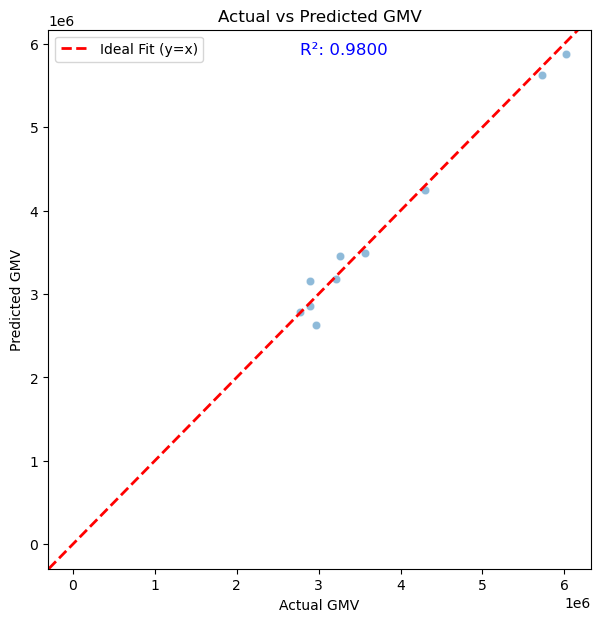

In [27]:
def plot_predictions(y_test, y_test_pred):
    """
    Plots actual GMV vs predicted GMV with enhancements.
    """
    plt.figure(figsize=(7,7))
    
    # Scatterplot with density coloring
    sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)
    
    # Ideal prediction line
    plt.axline((0,0), slope=1, color="red", linestyle="dashed", linewidth=2, label="Ideal Fit (y=x)")
    
    # Labels & title
    plt.xlabel("Actual GMV")
    plt.ylabel("Predicted GMV")
    plt.title("Actual vs Predicted GMV")

    # Annotate R² Score
    r2 = r2_score(y_test, y_test_pred)
    plt.text(min(y_test), max(y_test_pred), f"R²: {r2:.4f}", fontsize=12, color="blue")

    plt.legend()
    plt.show()


# Visualize Predictions
plot_predictions(y_test, y_test_pred)

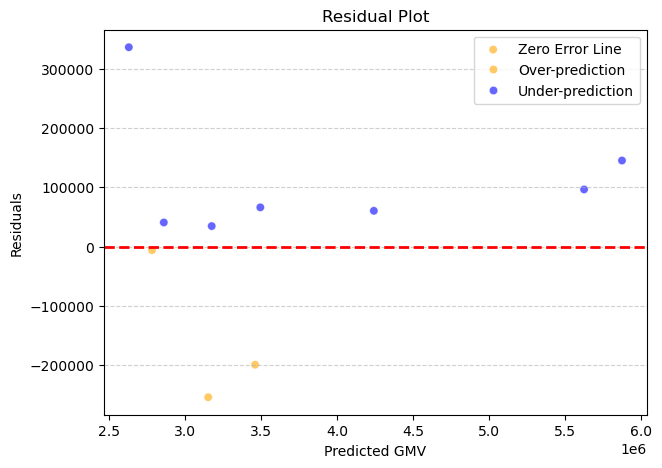

In [28]:
def plot_residuals(y_test, y_test_pred):
    """
    Plots residuals to check model stability with improvements.
    """
    residuals = y_test - y_test_pred
    
    plt.figure(figsize=(7,5))
    
    # Scatter plot with different colors for negative vs. positive residuals
    sns.scatterplot(x=y_test_pred, y=residuals, hue=residuals > 0, palette={True: "blue", False: "orange"}, alpha=0.6)

    plt.axhline(y=0, color="red", linestyle="dashed", linewidth=2)
    
    # Labels & title
    plt.xlabel("Predicted GMV")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    
    plt.legend(["Zero Error Line", "Over-prediction", "Under-prediction"])
    plt.grid(axis="y", linestyle="--", alpha=0.6)

    plt.show()



# Check Residuals for Model Stability
plot_residuals(y_test, y_test_pred)

## Model Elasticity

In [29]:
# import pandas as pd

# # Compute elasticity values
# elasticity = {}
# valid_features = final_model.params.index.tolist()  # Get features in final model

# for feature in X_train_final.columns:
#     if feature in valid_features:  # Ensure feature exists in model params
#         feature_mean = X_train_final[feature].mean()
#         coef = final_model.params[feature]
#         elasticity[feature] = (coef * feature_mean) / y_train.mean()

# # Convert to DataFrame
# elasticity_df = pd.DataFrame(list(elasticity.items()), columns=["Feature", "Elasticity"])

# # Display elasticity values
# from IPython.display import display
# display(elasticity_df)

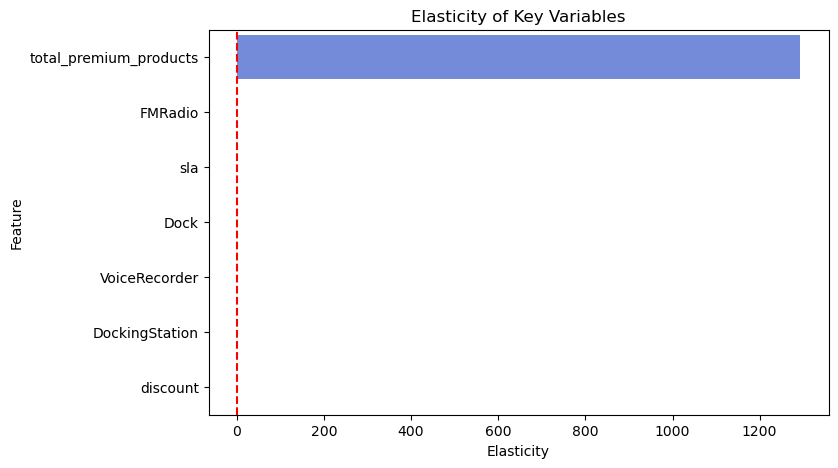

In [30]:
def get_elasticity(X_train_original, X_train_scaled, y_train, model):
    """
    Computes elasticity using original feature means instead of scaled values.
    This ensures more realistic elasticity values.
    """
    elasticity = {}
    valid_features = set(model.params.index.tolist())  # Features in final model

    for feature in X_train_scaled.columns:  # Use scaled feature names
        if feature in valid_features:
            feature_mean_original = X_train_original[feature].mean()  # Use original means
            coef = model.params[feature]
            elasticity[feature] = (coef * feature_mean_original) / (y_train.mean() + 1e-9)

    # Convert to DataFrame
    elasticity_df = pd.DataFrame(list(elasticity.items()), columns=["Feature", "Elasticity"])
    
    # Sort by absolute elasticity to highlight impact
    elasticity_df = elasticity_df.sort_values("Elasticity", ascending=False, key=abs)

    return elasticity_df

# Compute Elasticity (Using original data before scaling)
elasticity_df = get_elasticity(X_train, X_train_final_scaled, y_train, final_model)

# ✅ **Plot Updated Elasticity**
plt.figure(figsize=(8,5))
sns.barplot(y="Feature", x="Elasticity", data=elasticity_df, palette="coolwarm")  # Better color scheme
plt.xlabel("Elasticity")
plt.ylabel("Feature")
plt.title("Elasticity of Key Variables")

# Add zero reference line
plt.axvline(x=0, color="red", linestyle="--")

plt.show()


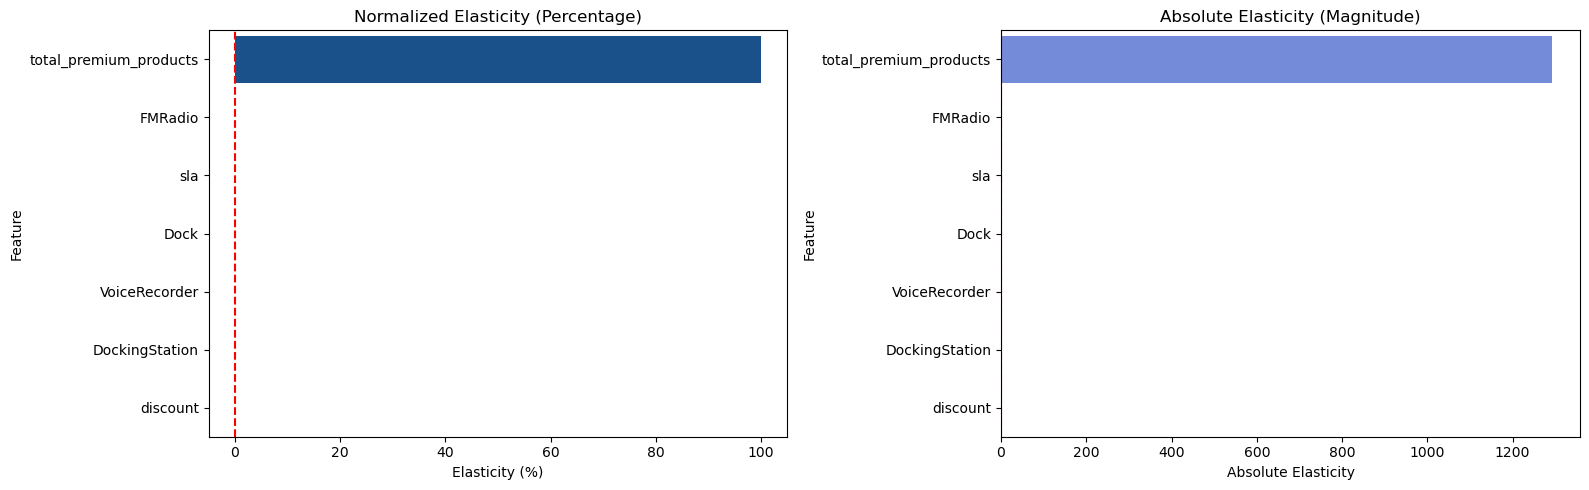

In [31]:
# Normalize Elasticity Values (convert to percentages)
elasticity_df["Normalized Elasticity"] = (elasticity_df["Elasticity"] / elasticity_df["Elasticity"].abs().max()) * 100

# Create Absolute Elasticity Column
elasticity_df["Absolute Elasticity"] = elasticity_df["Elasticity"].abs()

# Sort by absolute elasticity for better visualization
elasticity_df = elasticity_df.sort_values("Absolute Elasticity", ascending=False)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Normalized Elasticity Plot (Percentage)
sns.barplot(y="Feature", x="Normalized Elasticity", data=elasticity_df, ax=axes[0], palette="Blues_r")
axes[0].set_title("Normalized Elasticity (Percentage)")
axes[0].set_xlabel("Elasticity (%)")
axes[0].axvline(x=0, color="red", linestyle="--")

# Absolute Elasticity Plot
sns.barplot(y="Feature", x="Absolute Elasticity", data=elasticity_df, ax=axes[1], palette="coolwarm")
axes[1].set_title("Absolute Elasticity (Magnitude)")
axes[1].set_xlabel("Absolute Elasticity")
axes[1].axvline(x=0, color="red", linestyle="--")

plt.tight_layout()
plt.show()

# Ridge Regularization 

## Base Ridge Model

In [32]:
ridge_model = Ridge(alpha=1.0)  # Initial model with default alpha=1
ridge_model.fit(X_train_final, y_train)

# Predict on Train and Test
y_train_pred_ridge = ridge_model.predict(X_train_final)
y_test_pred_ridge = ridge_model.predict(X_test_final)

# Evaluate model performance
def evaluate_ridge_model(model, X, y, dataset_name="Test"):
    """
    Evaluates Ridge model performance on given dataset using R², MAE, MSE, and RMSE.
    """
    # Predict
    y_pred = model.predict(X)

    # Compute evaluation metrics
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)

    # Print results
    print(f"\n===== Ridge Model Performance on {dataset_name} Data =====")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")

    return r2, mae, mse, rmse

# Evaluate Ridge on train and test
evaluate_ridge_model(ridge_model, X_train_final, y_train, dataset_name="Train")
evaluate_ridge_model(ridge_model, X_test_final, y_test, dataset_name="Test")


===== Ridge Model Performance on Train Data =====
R² Score: 0.9944
MAE: 124074.16
MSE: 24911502179.75
RMSE: 157833.78

===== Ridge Model Performance on Test Data =====
R² Score: 0.9756
MAE: 155823.07
MSE: 31488843971.16
RMSE: 177450.96


(0.9756336583337367, 155823.07041421309, 31488843971.16102, 177450.9621590174)

## Looking at Ridge Regression in different values of alpha

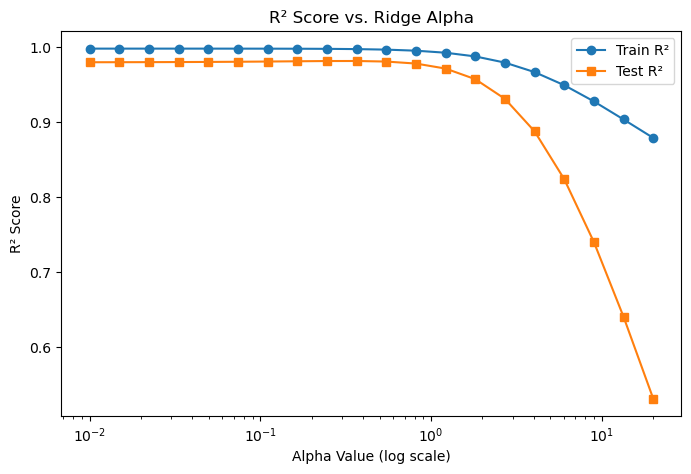

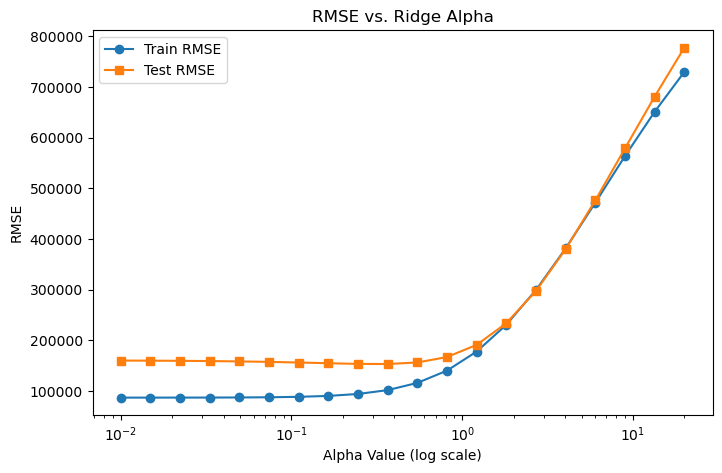

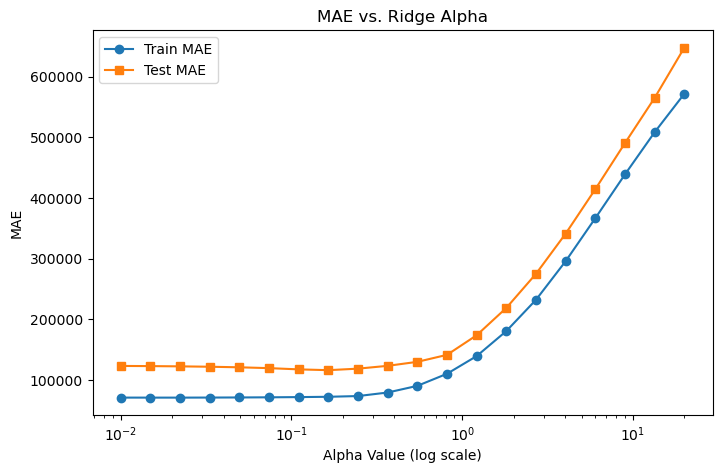

In [33]:
# Define alpha values to test (same range as before)
alpha_values = np.logspace(np.log10(0.01), np.log10(20), 20)

# Store results
train_r2, test_r2 = [], []
train_rmse, test_rmse = [], []
train_mae, test_mae = [], []

# Loop through each alpha value and train Ridge model
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_final, y_train)  # Updated dataset
    y_train_pred = ridge_model.predict(X_train_final)  # Updated dataset
    y_test_pred = ridge_model.predict(X_test_final)  # Updated dataset

    # Store metrics
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))

# Plot R² Scores
plt.figure(figsize=(8,5))
plt.plot(alpha_values, train_r2, marker='o', label="Train R²")
plt.plot(alpha_values, test_r2, marker='s', label="Test R²")
plt.xscale("log")
plt.xlabel("Alpha Value (log scale)")
plt.ylabel("R² Score")
plt.title("R² Score vs. Ridge Alpha")
plt.legend()
plt.show()

# Plot RMSE Scores
plt.figure(figsize=(8,5))
plt.plot(alpha_values, train_rmse, marker='o', label="Train RMSE")
plt.plot(alpha_values, test_rmse, marker='s', label="Test RMSE")
plt.xscale("log")
plt.xlabel("Alpha Value (log scale)")
plt.ylabel("RMSE")
plt.title("RMSE vs. Ridge Alpha")
plt.legend()
plt.show()

# Plot MAE Scores
plt.figure(figsize=(8,5))
plt.plot(alpha_values, train_mae, marker='o', label="Train MAE")
plt.plot(alpha_values, test_mae, marker='s', label="Test MAE")
plt.xscale("log")
plt.xlabel("Alpha Value (log scale)")
plt.ylabel("MAE")
plt.title("MAE vs. Ridge Alpha")
plt.legend()
plt.show()

## Grid Search CV for Ridge

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the alpha search space
ridge_params = {'alpha': np.logspace(-3, 3, 100)}

# Perform Grid Search Cross-Validation to find the best alpha
ridge_grid = GridSearchCV(Ridge(), ridge_params, scoring='r2', cv=5)
ridge_grid.fit(X_train_final, y_train)  

# Get the best alpha value
best_alpha = ridge_grid.best_params_['alpha']
print(f"\nBest Alpha from GridSearchCV: {best_alpha}")

# Train the final Ridge model with the best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_final, y_train)  

# Evaluate the final Ridge model
evaluate_ridge_model(ridge_best, X_train_final, y_train, dataset_name="Train")  
evaluate_ridge_model(ridge_best, X_test_final, y_test, dataset_name="Test")  


Best Alpha from GridSearchCV: 0.13219411484660287

===== Ridge Model Performance on Train Data =====
R² Score: 0.9982
MAE: 72119.35
MSE: 7977216050.26
RMSE: 89315.26

===== Ridge Model Performance on Test Data =====
R² Score: 0.9812
MAE: 116419.20
MSE: 24267549634.03
RMSE: 155780.45


(0.9812215587740456, 116419.19672317393, 24267549634.026566, 155780.4533117893)

## Getting Coefficients & Feature Importance of Best Ridge Model

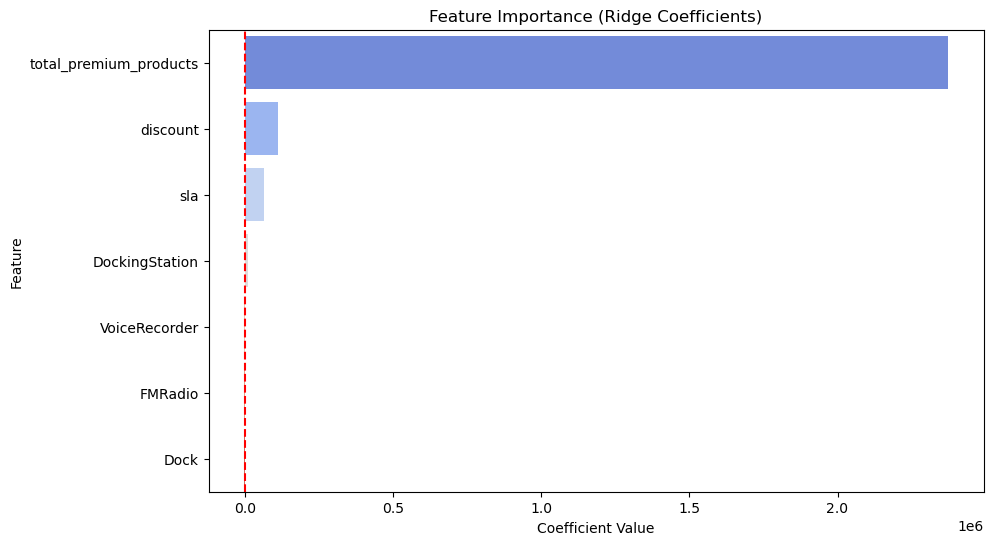

In [35]:
# Extract Ridge coefficients using the correct feature set
ridge_coefficients = pd.DataFrame({"Feature": X_train_final.columns, "Coefficient": ridge_best.coef_})
ridge_coefficients = ridge_coefficients.sort_values(by="Coefficient", ascending=False)

# Plot Ridge coefficients
plt.figure(figsize=(10, 6))
sns.barplot(y=ridge_coefficients["Feature"], x=ridge_coefficients["Coefficient"], palette="coolwarm")
plt.title("Feature Importance (Ridge Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.axvline(x=0, color="red", linestyle="--")
plt.show()

## VIF Check

In [36]:
def calculate_vif(X):
    """
    Computes Variance Inflation Factor (VIF) to check multicollinearity.
    """
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values(by="VIF", ascending=False)

# Calculate VIF using the optimized feature set
ridge_vif = calculate_vif(X_train_final)

print("\nVariance Inflation Factor (VIF) after Ridge Regression:")
print(ridge_vif)


Variance Inflation Factor (VIF) after Ridge Regression:
                  Feature     VIF
6                 FMRadio 18.5092
5           VoiceRecorder 15.0979
4                    Dock 14.6835
3          DockingStation  9.9507
1                discount  3.2560
2  total_premium_products  2.5632
0                     sla  2.5007


## Ridge Model Predictions

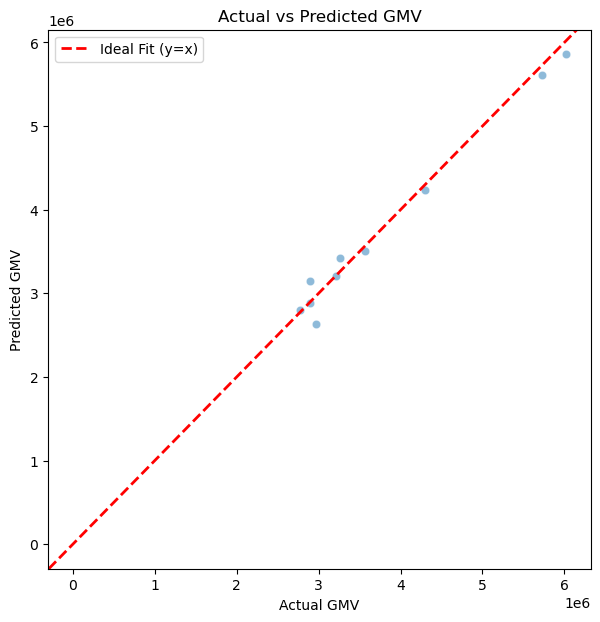

In [37]:
def plot_predictions(y_test, y_test_pred):
    plt.figure(figsize=(7,7))
    sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)
    plt.axline((0,0), slope=1, color="red", linestyle="dashed", linewidth=2, label="Ideal Fit (y=x)")
    plt.xlabel("Actual GMV")
    plt.ylabel("Predicted GMV")
    plt.title("Actual vs Predicted GMV")
    plt.legend()
    plt.show()

# Generate predictions using the correct test set
plot_predictions(y_test, ridge_best.predict(X_test_final))

## Residuals Plot

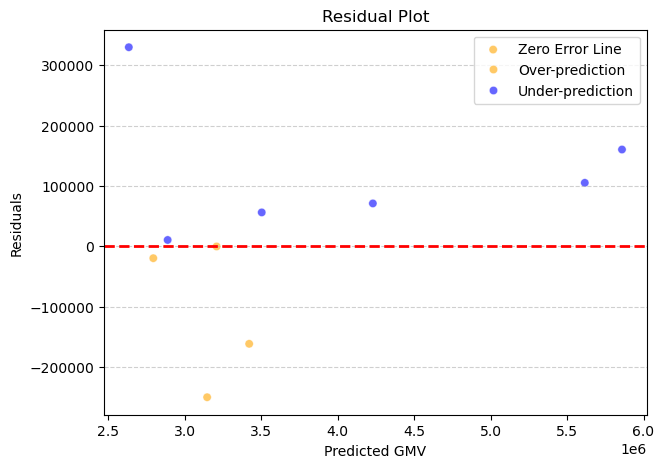

In [38]:
def plot_residuals(y_test, y_test_pred):
    residuals = y_test - y_test_pred
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=y_test_pred, y=residuals, hue=residuals > 0, palette={True: "blue", False: "orange"}, alpha=0.6)
    plt.axhline(y=0, color="red", linestyle="dashed", linewidth=2)
    plt.xlabel("Predicted GMV")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.legend(["Zero Error Line", "Over-prediction", "Under-prediction"])
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()

# Generate residual plot using the correct test dataset
plot_residuals(y_test, ridge_best.predict(X_test_final))

## Ridge Elasticity Plot

In [39]:
# # Compute Elasticity using the correct dataset
# ridge_coefficients["Elasticity"] = ridge_coefficients["Coefficient"] * np.std(X_train_final, axis=0) / np.std(y_train)
# ridge_coefficients["Absolute Elasticity"] = ridge_coefficients["Elasticity"].abs()
# ridge_coefficients = ridge_coefficients.sort_values(by="Absolute Elasticity", ascending=False)

# # Plot Elasticity
# plt.figure(figsize=(10,6))
# sns.barplot(y="Feature", x="Elasticity", data=ridge_coefficients, palette="coolwarm")
# plt.title("Feature Elasticity")
# plt.xlabel("Elasticity")
# plt.axvline(x=0, color="red", linestyle="--")
# plt.show()

# Elasti Net Regularization

## Training the Initial Elasti Net Model

In [40]:
# Train ElasticNet model with default alpha and l1_ratio (50% L1, 50% L2)
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  
elasticnet_model.fit(X_train_final, y_train)

# Predict on Train and Test
y_train_pred_en = elasticnet_model.predict(X_train_final)
y_test_pred_en = elasticnet_model.predict(X_test_final)

# Evaluate ElasticNet model performance
evaluate_ridge_model(elasticnet_model, X_train_final, y_train, dataset_name="Train")
evaluate_ridge_model(elasticnet_model, X_test_final, y_test, dataset_name="Test")


===== Ridge Model Performance on Train Data =====
R² Score: 0.8793
MAE: 571944.60
MSE: 532987381844.87
RMSE: 730059.85

===== Ridge Model Performance on Test Data =====
R² Score: 0.5316
MAE: 647953.13
MSE: 605260498102.32
RMSE: 777984.90


(0.5316441560267917, 647953.1283053827, 605260498102.3171, 777984.8958060286)

## Evaluate ElasticNet Across Different Alpha Values

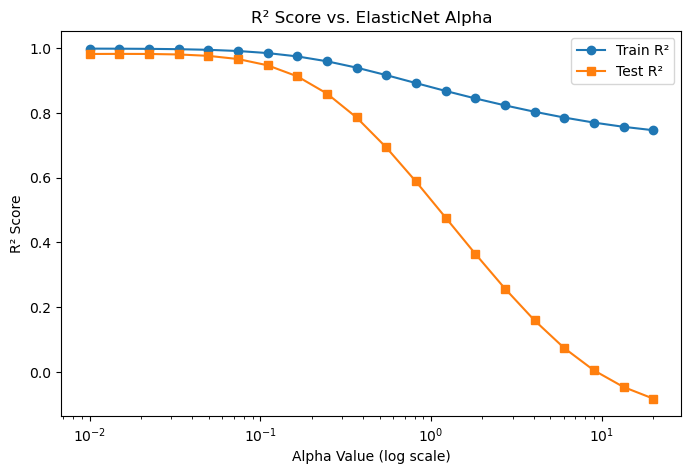

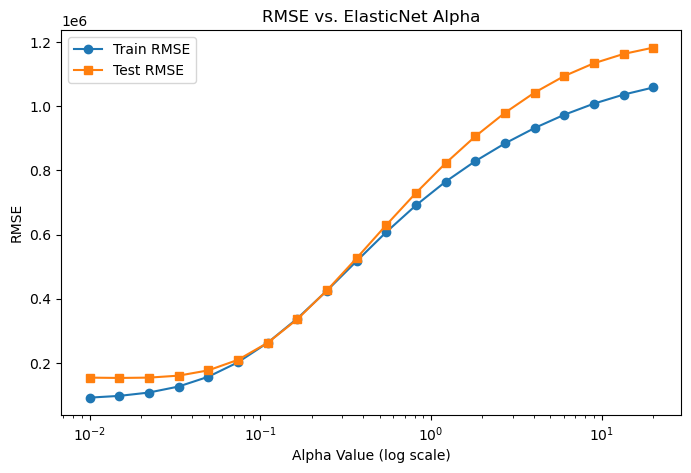

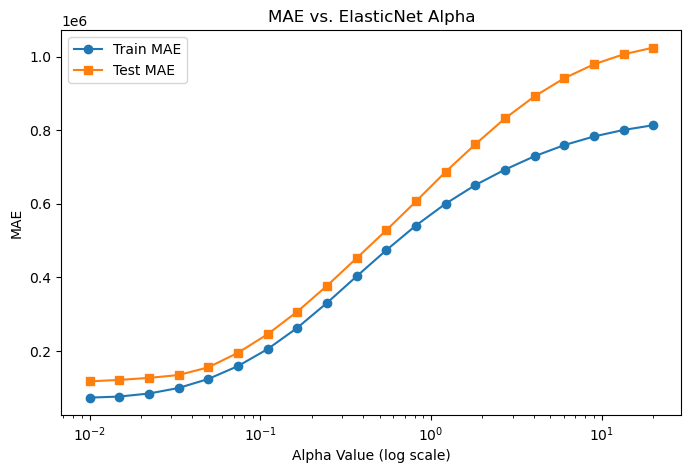

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet

# Define alpha values to test
alpha_values = np.logspace(np.log10(0.01), np.log10(20), 20)

# Store results
train_r2, test_r2 = [], []
train_rmse, test_rmse = [], []
train_mae, test_mae = [], []

# Loop through each alpha value and train ElasticNet model
for alpha in alpha_values:
    elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=0.5)  # Keeping l1_ratio constant at 0.5 for now
    elasticnet_model.fit(X_train_final, y_train)
    y_train_pred = elasticnet_model.predict(X_train_final)
    y_test_pred = elasticnet_model.predict(X_test_final)

    # Store metrics
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))

# Plot R² Scores
plt.figure(figsize=(8,5))
plt.plot(alpha_values, train_r2, marker='o', label="Train R²")
plt.plot(alpha_values, test_r2, marker='s', label="Test R²")
plt.xscale("log")
plt.xlabel("Alpha Value (log scale)")
plt.ylabel("R² Score")
plt.title("R² Score vs. ElasticNet Alpha")
plt.legend()
plt.show()

# Plot RMSE Scores
plt.figure(figsize=(8,5))
plt.plot(alpha_values, train_rmse, marker='o', label="Train RMSE")
plt.plot(alpha_values, test_rmse, marker='s', label="Test RMSE")
plt.xscale("log")
plt.xlabel("Alpha Value (log scale)")
plt.ylabel("RMSE")
plt.title("RMSE vs. ElasticNet Alpha")
plt.legend()
plt.show()

# Plot MAE Scores
plt.figure(figsize=(8,5))
plt.plot(alpha_values, train_mae, marker='o', label="Train MAE")
plt.plot(alpha_values, test_mae, marker='s', label="Test MAE")
plt.xscale("log")
plt.xlabel("Alpha Value (log scale)")
plt.ylabel("MAE")
plt.title("MAE vs. ElasticNet Alpha")
plt.legend()
plt.show()

## Hyperparameter Tuning (GridSearchCV)

In [42]:
# Define hyperparameter grid
elasticnet_params = {
    'alpha': np.logspace(-3, 3, 100),  # Alpha range
    'l1_ratio': np.linspace(0.1, 1, 10)  # Varying L1 penalty (closer to 1 is Lasso, closer to 0 is Ridge)
}

# Perform Grid Search Cross-Validation
elasticnet_grid = GridSearchCV(ElasticNet(), elasticnet_params, scoring='r2', cv=5, n_jobs=-1)
elasticnet_grid.fit(X_train_final, y_train)

# Get the best hyperparameters
best_alpha = elasticnet_grid.best_params_['alpha']
best_l1_ratio = elasticnet_grid.best_params_['l1_ratio']
print(f"\nBest Alpha from GridSearchCV: {best_alpha}")
print(f"Best L1 Ratio from GridSearchCV: {best_l1_ratio}")


Best Alpha from GridSearchCV: 0.008111308307896872
Best L1 Ratio from GridSearchCV: 0.5


## Train Final ElasticNet Model

In [43]:
# Train final ElasticNet model with best hyperparameters
elasticnet_best = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
elasticnet_best.fit(X_train_final, y_train)

# Evaluate final ElasticNet model
evaluate_ridge_model(elasticnet_best, X_train_final, y_train, dataset_name="Train")
evaluate_ridge_model(elasticnet_best, X_test_final, y_test, dataset_name="Test")


===== Ridge Model Performance on Train Data =====
R² Score: 0.9981
MAE: 72404.39
MSE: 8170939783.81
RMSE: 90393.25

===== Ridge Model Performance on Test Data =====
R² Score: 0.9814
MAE: 116302.35
MSE: 24034027614.73
RMSE: 155029.12


(0.9814022601460575, 116302.34510339149, 24034027614.73497, 155029.11860271596)

## Feature Importance (ElasticNet Coefficients)

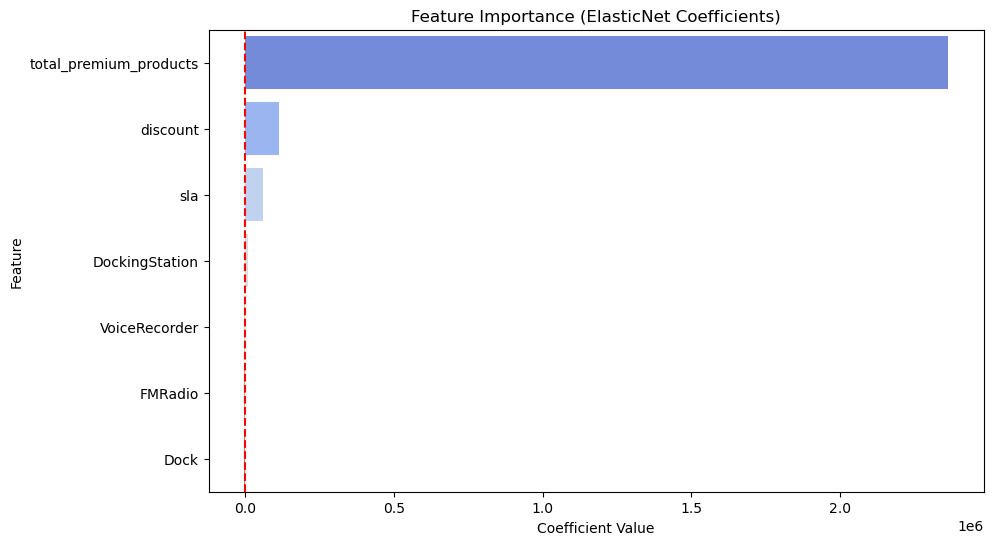

In [44]:
# Extract coefficients
elasticnet_coefficients = pd.DataFrame({"Feature": X_train_final.columns, "Coefficient": elasticnet_best.coef_})
elasticnet_coefficients = elasticnet_coefficients.sort_values(by="Coefficient", ascending=False)

# Plot coefficients
plt.figure(figsize=(10,6))
sns.barplot(y=elasticnet_coefficients["Feature"], x=elasticnet_coefficients["Coefficient"], palette="coolwarm")
plt.title("Feature Importance (ElasticNet Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.axvline(x=0, color="red", linestyle="--")
plt.show()

## Calculate VIF for ElasticNet

In [45]:
elasticnet_vif = calculate_vif(X_train_final)

print("\nVariance Inflation Factor (VIF) after ElasticNet Regression:")
print(elasticnet_vif)


Variance Inflation Factor (VIF) after ElasticNet Regression:
                  Feature     VIF
6                 FMRadio 18.5092
5           VoiceRecorder 15.0979
4                    Dock 14.6835
3          DockingStation  9.9507
1                discount  3.2560
2  total_premium_products  2.5632
0                     sla  2.5007


## Plot Predictions and Residual Plots

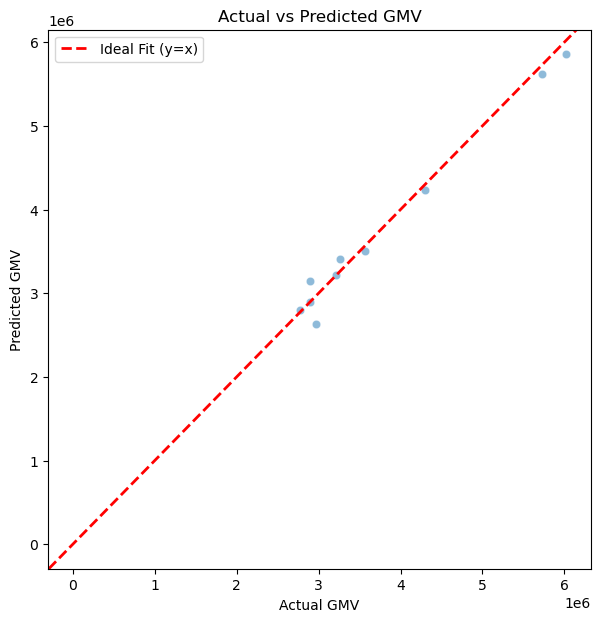

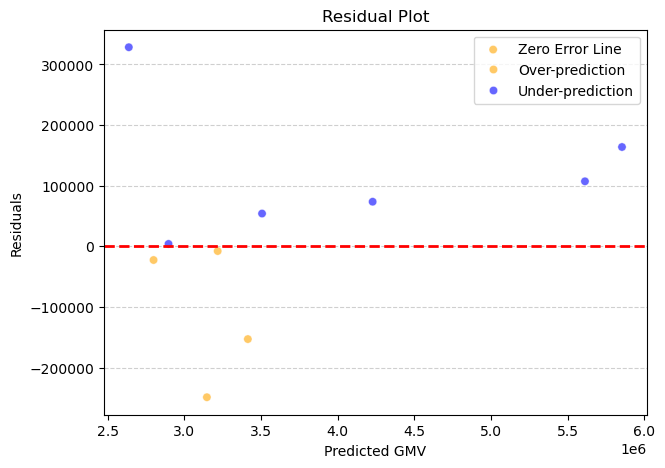

In [46]:
# Prediction Plot
plot_predictions(y_test, elasticnet_best.predict(X_test_final))

# Residual Plot
plot_residuals(y_test, elasticnet_best.predict(X_test_final))

In [47]:
# # Compute Elasticity using the correct dataset
# elasticnet_coefficients["Elasticity"] = elasticnet_coefficients["Coefficient"] * np.std(X_train_final, axis=0) / np.std(y_train)
# elasticnet_coefficients["Absolute Elasticity"] = elasticnet_coefficients["Elasticity"].abs()
# elasticnet_coefficients = elasticnet_coefficients.sort_values(by="Absolute Elasticity", ascending=False)

# # If Elasticity values are too small, scale them up
# if elasticnet_coefficients["Elasticity"].abs().max() < 0.01:
#     print("Elasticity values are too small, scaling up...")
#     elasticnet_coefficients["Elasticity"] *= 100  

# # Plot Elasticity
# plt.figure(figsize=(10,6))
# sns.barplot(y="Feature", x="Elasticity", data=elasticnet_coefficients, palette="coolwarm")
# plt.title("Feature Elasticity")
# plt.xlabel("Elasticity")
# plt.axvline(x=0, color="red", linestyle="--")
# plt.show()